<a href="https://colab.research.google.com/github/MrCee95/Employee-Attrition/blob/main/Employee%20Attrition%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 #Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#@title Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx to Hash-Analytic-Python-Analytics-Problem-case-study-1 (1).xlsx


In [8]:
# Importing the dataset from excel file

excelfile=pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")

df_left=pd.read_excel(excelfile,'Employees who have left')  # Sheet 2
df_notleft=pd.read_excel(excelfile,'Existing employees')    # Sheet 3

In [9]:
#@title Reading file
df_left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [10]:
#@title Reading file
df_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [11]:
#@title
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [12]:
#@title Number of mployees in each department
df_left.dept.value_counts()

,count
dept,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [13]:
# Combining the IT, support and Technical in one value as Technical

df_left['dept']=np.where(df_left['dept']=='support','technical',df_left['dept']).astype('str')
df_left['dept']=np.where(df_left['dept']=='IT','technical',df_left['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='support','technical',df_notleft['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='IT','technical',df_notleft['dept']).astype('str')

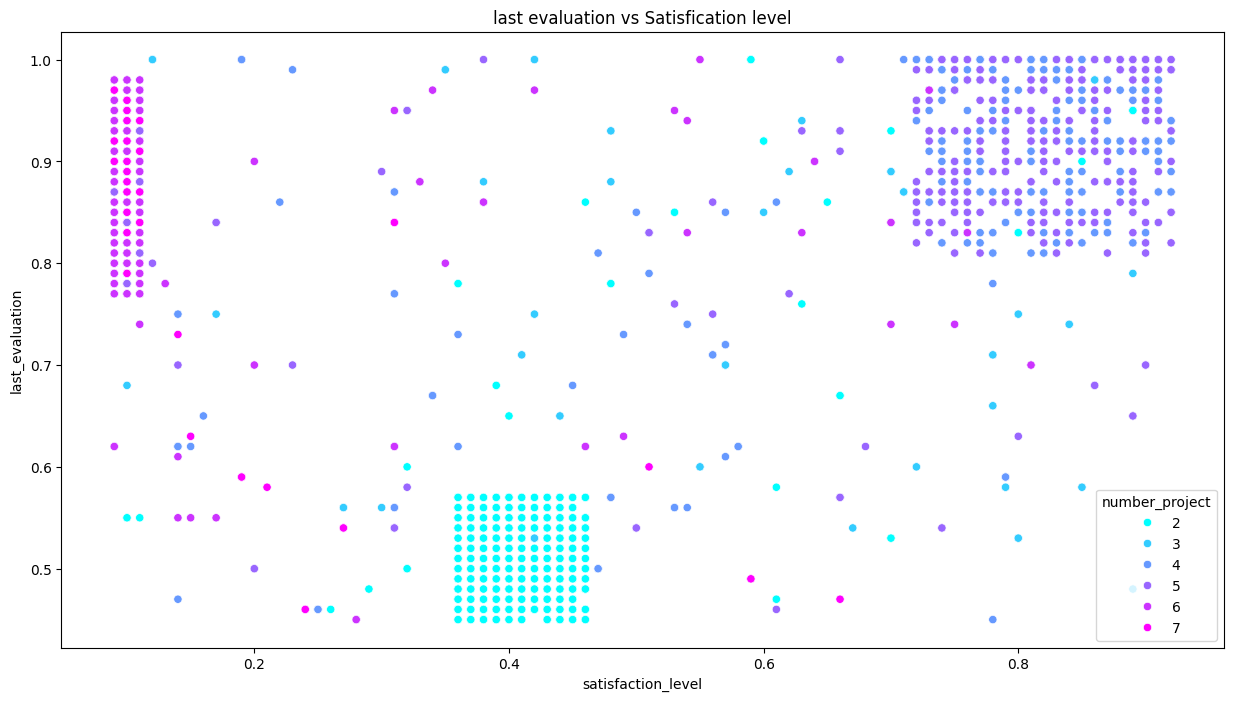

In [14]:
#@title Compare values of the employees based on each factor and the reason why they are leaving.
plt.figure(figsize=(15,8))
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=df_left['satisfaction_level'],y=df_left['last_evaluation'],hue='number_project',data=df_left, palette='cool')
plt.show()

from the above plot, we draw the following points:

    Satisfaction level is very low for employees who has number of projects more than 4
    Last evaluation for employees having number of projects equal to 2 is low, also they have low satisfaction level.

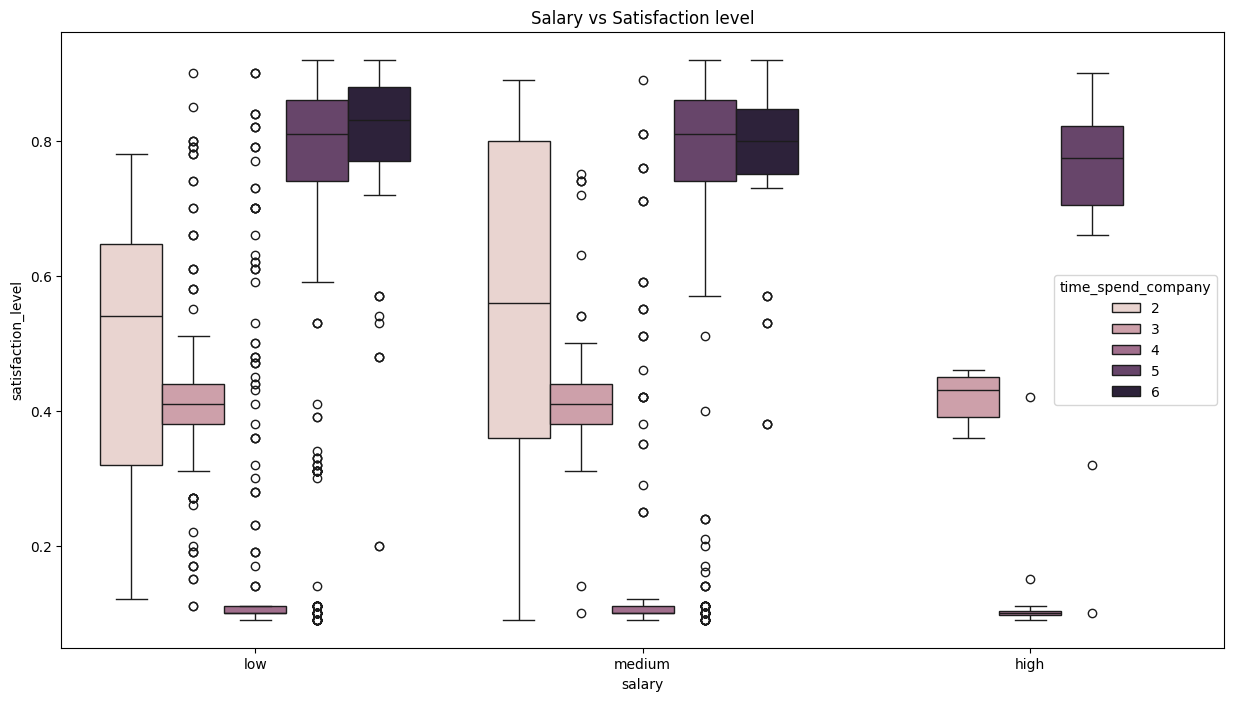

In [15]:
 #compare the Salary vs Satisfaction level based on the time spent in the company
plt.figure(figsize=(15,8))
plt.title('Salary vs Satisfaction level')
sns.boxplot(x=df_left['salary'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()


from the above plot, we draw the following points:

*   Satisfcation level is very low for employees who spent time in the company equal to 4 for all levels of salary.

*   For low salary employees, most of the employees belong to the 2nd quartile with less satisfaction levels as we can see the median is shifted to the upper quartile.
*   We can see there are so many oultiers from each salary levels.
*   The box plot is bigger for meduim salary emplyoees who spent time in the company is equal to 2, 50% of these employees have low satifaction levels.
    


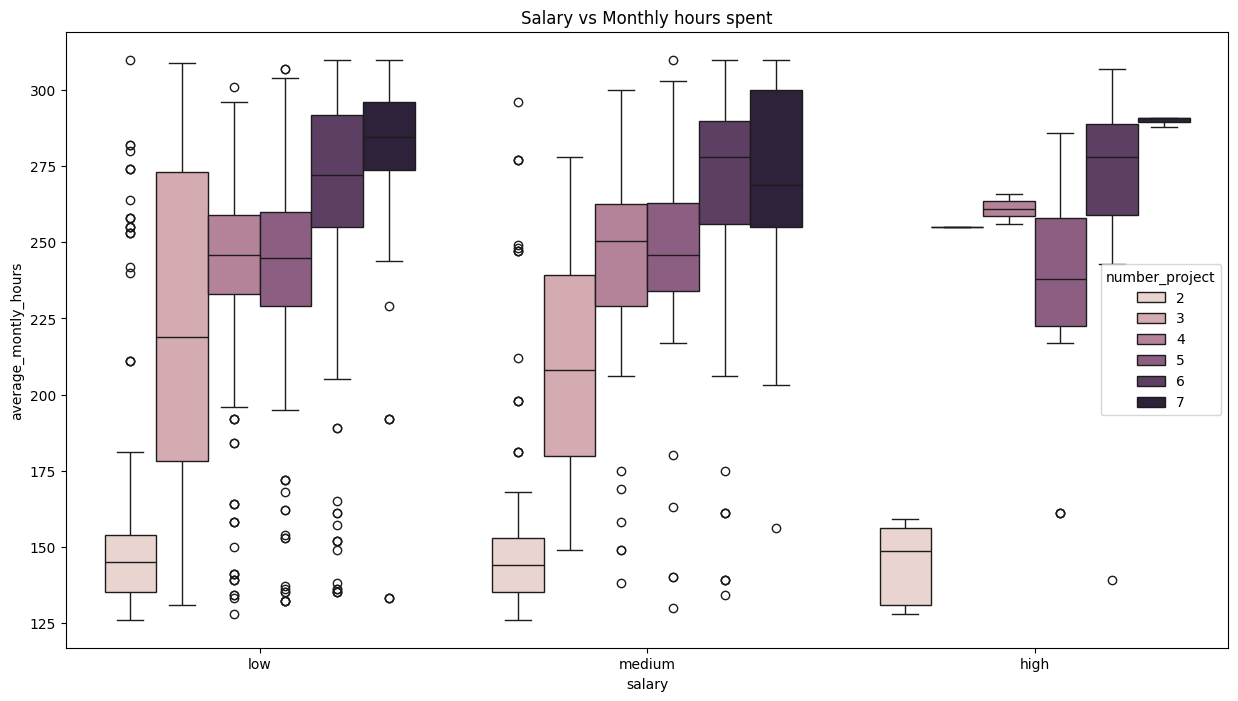

In [16]:
#compare the Salary vs Monthly hours spent based upon the number of projects that they have done
plt.figure(figsize=(15,8))
plt.title("Salary vs Monthly hours spent")
sns.boxplot(x=df_left['salary'],y=df_left['average_montly_hours'],hue='number_project',data=df_left)
plt.show()



Point drawn from above plot:

* Avereage monlthy hours is very low for employees who has number of projects equal to 2 for all levels of salary.
*   As we can see from the plot the employees from all levels for salary are loaded with projets and monthly hours is high.
*   We can see there are so many oultiers from low and meduim salary levels.
*   The box plot is bigger for low salary emplyoees who has number of projects equal to 3, 50% of these employees high monthly hours.



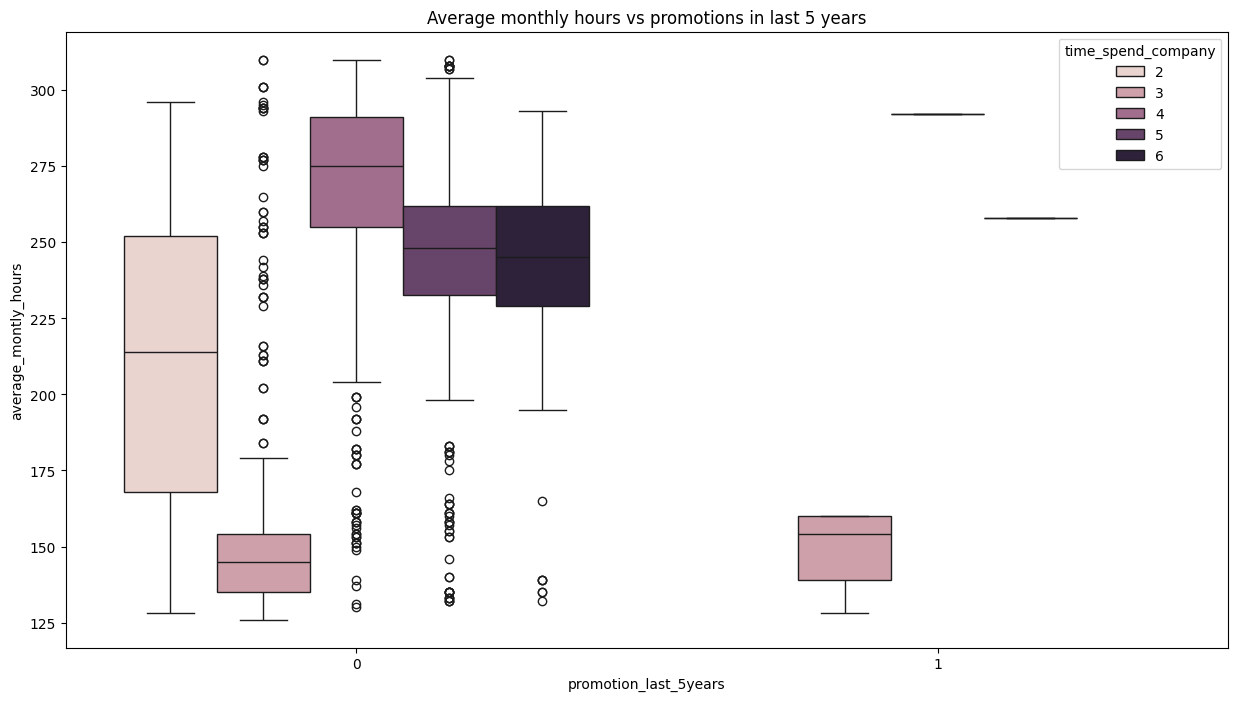

In [17]:
#More reasons for why the employees left
plt.figure(figsize=(15,8))
plt.title("Average monthly hours vs promotions in last 5 years")
sns.boxplot(x=df_left['promotion_last_5years'],y=df_left['average_montly_hours'],hue='time_spend_company',data=df_left)
plt.show()


Interesting points drawn from above plot:

*   Employees who got promotion in last 5 years have less average monthly hours, that to who has spend exactly 3 years in the company.
*   Very few employees from higher duration time spend in the comapny got promotion.
*   The employees who has not got the promotion are having higher avrage monthly hours and mostly time spend in the comapny is more than or equal 4 years with few outliers.






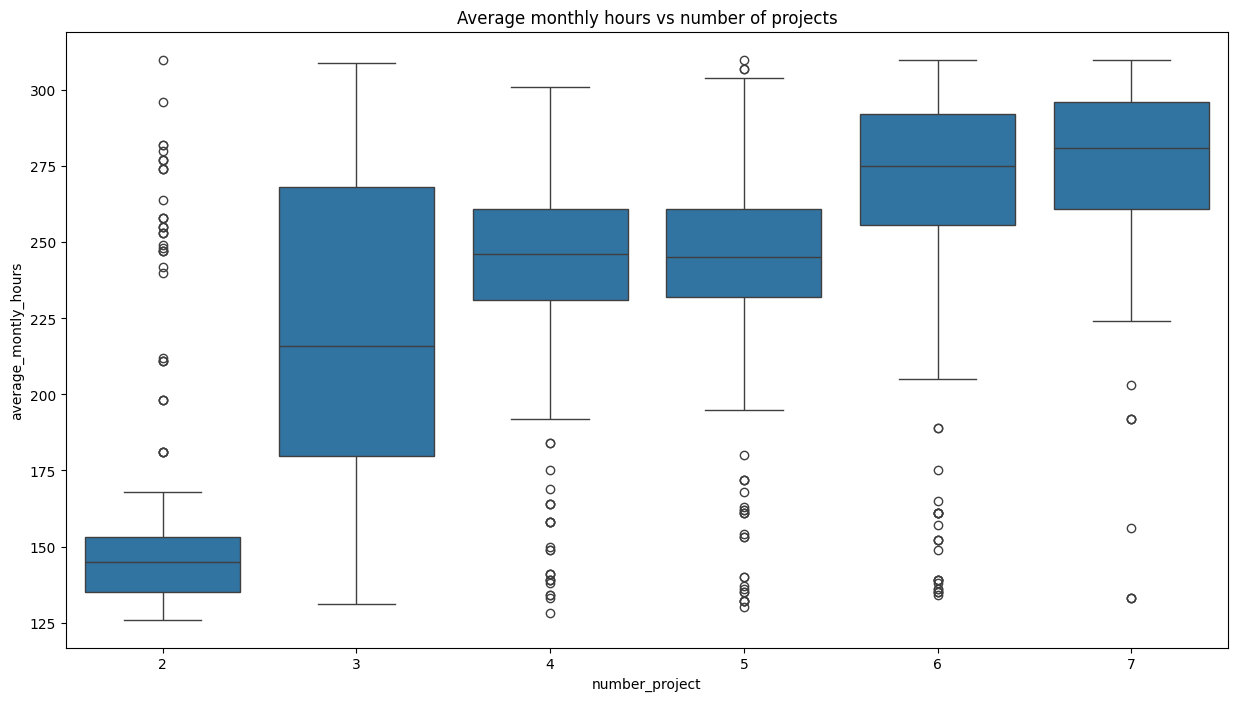

In [18]:
plt.figure(figsize=(15,8))
plt.title('Average monthly hours vs number of projects')
sns.boxplot(x=df_left['number_project'],y=df_left['average_montly_hours'],data=df_left)
plt.show()

From the above plot, As the number of projects goes higher average monthly hours goes high as well. Most fo the employees belong to the project number equal to 3 as it has bigger boxplot than others

<Figure size 1500x1000 with 0 Axes>

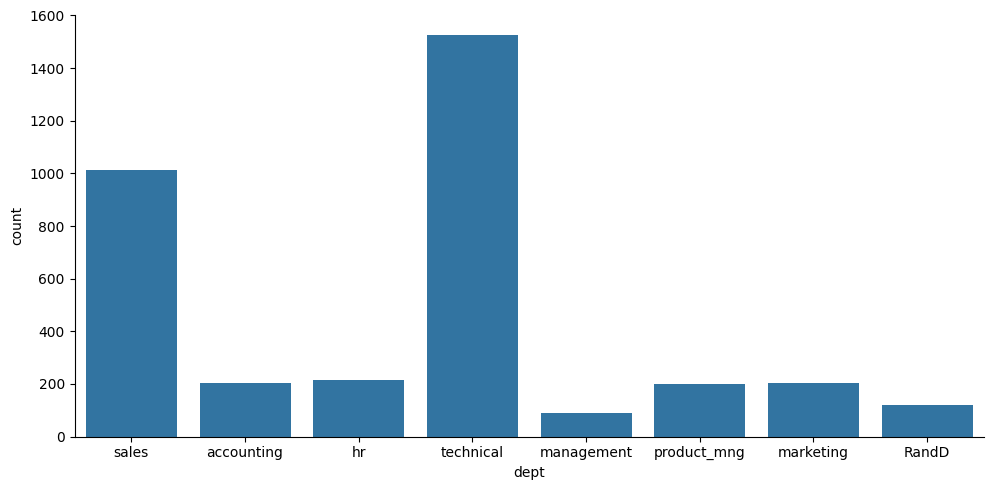

In [20]:
#The department that has the most number of employees leaving
plt.figure(figsize=(15,10))
sns.catplot(x='dept',data=df_left,kind='count',aspect=2)
plt.show()

Sales and Technical departments had most number of employees leaving the company.

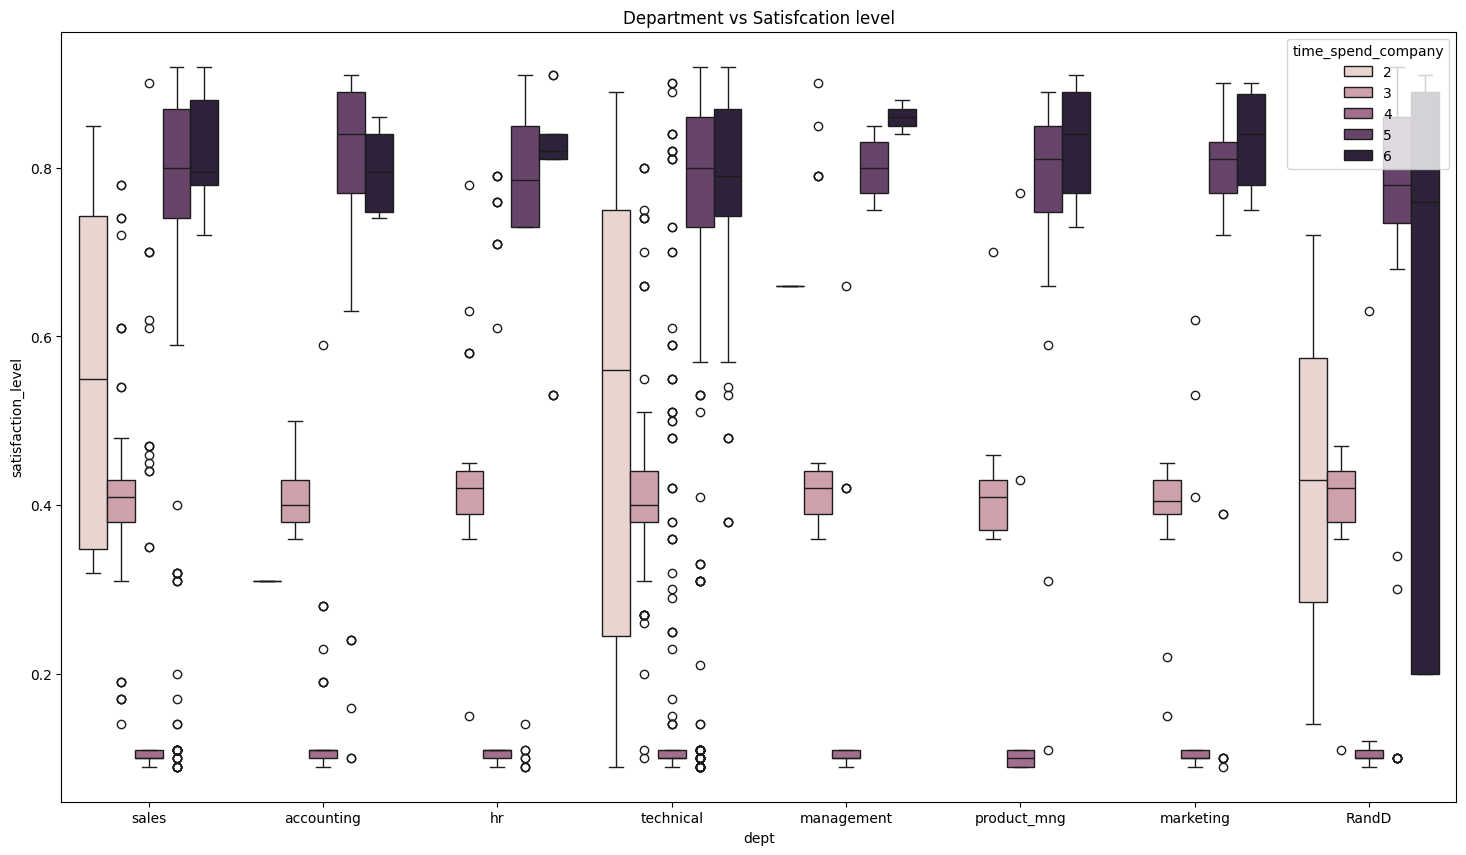

In [21]:
#Department vs Satisfaction level of the employees based upon the time spend in the company.
plt.figure(figsize=(18,10))
plt.title("Department vs Satisfcation level")
sns.boxplot(x=df_left['dept'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()

Intersting points we can draw from above plot:    
*   Employees from R&D department having 6 years of time spend having large distribution of satisfaction levels.
*   Time spend equal to 4 in all departments are having same level of very low satisfaction levels same goes for time spend equals to 3 having same level of average satisfcations in all departments.
*   Employees from sales and Technical department of 2 yeras of time spend is also having larger distributions of satisfaction levels as expected


In [22]:
#Finding the proportion of employees leaving from the company

# Adding both dataset from employees who left with the existing employees
df_left['Left']=1
df_notleft['Left']=0
final_df=pd.concat([df_left,df_notleft],axis=0)
final_df.info()

# Creating dummies
columns=['dept','salary']
dummies=pd.get_dummies(final_df[columns],drop_first=True)
final_df=pd.concat([final_df,dummies],axis=1)
final_df.head()

# Dropping uncessary columns
final_df=final_df.drop(columns,axis=1)
final_df.info()

# Dividing the dataset into X and Y
X=final_df.drop(['Emp ID','Left'],axis=1)
y=final_df['Left']

print("The proportion of employees left is {}% from total dataset".format(round(final_df.Left.value_counts()[1]/len(final_df)*100,2)))

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 11427
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
--

The proportion of employees left is 23.81% from total dataset

In [23]:
# Splitting the X and y into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
#Random Forest Classifier
# Logisstic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model=LogisticRegression()
logreg=RFE(model,n_features_to_select=15)
logreg.fit(X_train,y_train)

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,logreg.predict(X_test))))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,logreg.predict(X_test))))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,logreg.predict(X_test))))

# Random forest cloassifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)
rfc.fit(X_train,y_train)

# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,rfc.predict(X_test))))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,rfc.predict(X_test))))

# Support vector classifier

from sklearn.svm import SVC
model=SVC(C=1)
model.fit(X_train,y_train)

# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,model.predict(X_test))))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,model.predict(X_test))))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,model.predict(X_test))))

The Accuracy score using logistic regression is:0.789
The Precison score using logistic regression is:0.626
The Recall score using logistic regression is:0.353
The F1 score using logistic regression is:0.451
The Accuracy score using Random Forest Classifier is:0.992
The Precison score using Random Forest Classifier is:0.995
The Recall score using Random Forest Classifier is:0.971
The Recall score using Random Forest Classifier is:0.983
The Accuracy score using SVC is:0.771
The Precison score using SVC is:1.000
The Recall score using SVC is:0.067


In [26]:
# Oversamlpling

from sklearn.utils import resample

y = final_df['Left']
X= final_df.drop(['Left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=50)

X=pd.concat([X_train,y_train],axis=1)

emp_not_left=X[X.Left==0]
emp_left=X[X.Left==1]

In [27]:
# unsampling the minority by adding dummy rows to the left equal to 1

left_upsampled= resample(emp_left,replace=True,n_samples=len(emp_not_left),random_state=50)

left_upsampled=pd.concat([emp_not_left,left_upsampled])

left_upsampled.Left.value_counts()

,count
Left,
0,8573
1,8573


In [28]:
# Preparing for X train and Y train dataset

y_train=left_upsampled.Left
X_train=left_upsampled.drop('Left',axis=1)

In [30]:
# Model building

new_logreg=LogisticRegression()
logreg_rfe=RFE(new_logreg, n_features_to_select=15)
logreg_rfe.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_pred=logreg_rfe.predict(X_test.drop('Emp ID',axis=1))

In [31]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,upsampled_pred)))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,upsampled_pred)))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,upsampled_pred)))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,upsampled_pred)))

The Accuracy score using logistic regression is:0.758
The Precison score using logistic regression is:0.495
The Recall score using logistic regression is:0.797
The F1 score using logistic regression is:0.611


In [32]:
# Model Building

upsampled_svc=SVC(C=1)
upsampled_svc.fit(X_train.drop('Emp ID',axis=1),y_train)
svc_upsampled_pred=upsampled_svc.predict(X_test.drop('Emp ID',axis=1))

In [33]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,svc_upsampled_pred)))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,svc_upsampled_pred)))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,svc_upsampled_pred)))
print("The F1 score using SVC is:{:.3f}".format(f1_score(y_test,svc_upsampled_pred)))

The Accuracy score using SVC is:0.680
The Precison score using SVC is:0.404
The Recall score using SVC is:0.716
The F1 score using SVC is:0.517


Conclusion: from the above all models we use random forest algorithm as it gives us better Accuracy and F1 score than other algorithms.

In [ ]:
#A 5 Fold Grid Search Cross Validation
# Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rfc=RandomForestClassifier(random_state=50)

n_folds=KFold(n_splits=5,shuffle=True, random_state=50)

parameters={'criterion':['gini','entropy'],'max_depth': range(5,30,5),'max_features': range(10,18,2),
            'min_samples_split': range(2,10,2)}

model_cv = GridSearchCV(estimator=rfc,param_grid=parameters,cv=n_folds,verbose=1,
                        return_train_score=True,scoring='recall')

model_cv.fit(X_train.drop('Emp ID',axis=1),y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

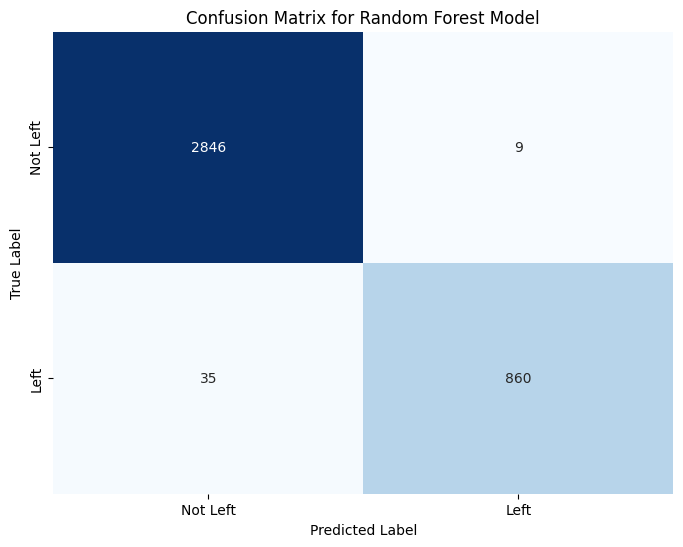

In [39]:
# First, ensure y_pred is defined by running the final Random Forest model prediction
# This line is copied from cell q9LbYfBmqqcb to make this cell self-contained.
# If cell q9LbYfBmqqcb was run successfully, this line can be removed.
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
model_cv.best_params_

In [ ]:
model_cv.best_score_

In [ ]:
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
final_rfc.feature_importances_

In [ ]:
X_train.columns

In [ ]:

#Feature Importance

features=np.array(X_train.drop('Emp ID',axis=1).columns)
important=final_rfc.feature_importances_
indexes_features=important.argsort()
for i in indexes_features:
    print("{} : {:.2f}%".format(features[i],important[i]*100))


In [ ]:
# Finding employees who are prone to leave

y_test1=pd.concat([y_test,X_test['Emp ID']],axis=1)
y_test3=pd.DataFrame(y_pred)

y_test3.reset_index(inplace=True, drop=True)

gf=pd.concat([y_test1.reset_index(),y_test3],1)

new_df=gf[gf.Left==0]

new_df=new_df.drop('index',axis=1)

new_df.columns=['Left','Emp ID','Predicted_left']

Employees_prone_to_leave=new_df[new_df['Predicted_left']==1]
Employees_prone_to_leave=Employees_prone_to_leave.reset_index()
Employees_prone_to_leave=Employees_prone_to_leave.drop(['Left','Predicted_left','index'],axis=1)

In [ ]:
Employees_prone_to_leave